# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('train.csv')
df[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


In [3]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'Cant_nan']
    
    # percentage of nan
    d2[['%_nan']]=(d2[['Cant_nan']]/tot_rows) * 100
    
    # num of zeros
    d2['Cant_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['%_zeros']=(d2[['Cant_zeros']]/tot_rows) * 100

    # total unique values
    d2['unique']=data2.nunique().values
    
    #get num of tot_rows
    d2['tot_rows'] = tot_rows
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [4]:
status(df)

,variable,Cant_nan,%_nan,Cant_zeros,%_zeros,unique,tot_rows,type
0,PassengerId,0,0.000000,1,0.012783,7823,7823,int64
1,HomePlanet,179,2.288125,0,0.000000,3,7823,object
2,CryoSleep,196,2.505433,4871,62.265116,2,7823,object
3,Cabin,184,2.352039,0,0.000000,6009,7823,object
4,Destination,160,2.045251,0,0.000000,3,7823,object
5,Age,162,2.070817,160,2.045251,80,7823,float64
6,VIP,184,2.352039,7456,95.308705,2,7823,object
7,RoomService,154,1.968554,5042,64.450978,1195,7823,float64
8,FoodCourt,155,1.981337,4940,63.147130,1400,7823,float64
9,ShoppingMall,188,2.403170,5036,64.374281,1045,7823,float64


In [5]:
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [6]:
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [7]:
df[df.CryoSleep.isnull()][:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
42,5486,Earth,NaN,F/1209/P,TRAPPIST-1e,64.0,False,0.0,623.0,1827.0,0.0,0.0,Hanna Horndley,1
99,3747,Earth,NaN,G/660/S,TRAPPIST-1e,45.0,False,1796.0,0.0,4.0,0.0,5.0,Kariel Wolfaddox,0
100,730,Earth,NaN,G/117/S,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Mclardson,0


In [8]:
df[df.Cabin.isnull()][:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,15,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0
62,272,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,0
87,1970,Earth,False,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Brinez Bootez,0


In [9]:
df[df.HomePlanet.isnull()][:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
33,5988,NaN,False,G/1022/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Stanya Schmondez,0
49,2544,NaN,True,G/433/S,TRAPPIST-1e,52.0,False,0.0,0.0,0.0,0.0,0.0,Royce Douglasen,1
98,4374,NaN,True,B/154/P,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,Rotan Seflock,1


In [10]:
df[df.Destination.isnull()][:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
50,2761,Earth,False,G/486/P,NaN,37.0,False,221.0,0.0,32.0,38.0,516.0,Russey Miley,0
77,6813,Earth,False,F/1382/S,NaN,36.0,False,0.0,129.0,0.0,177.0,444.0,Raque Waterson,0


In [11]:
df[df.VIP.isnull()][:3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
11,7941,Earth,False,F/1738/P,TRAPPIST-1e,27.0,NaN,0.0,0.0,0.0,716.0,0.0,Heremy Cardner,0
134,5535,Mars,True,F/1220/P,TRAPPIST-1e,6.0,NaN,0.0,0.0,0.0,0.0,0.0,Gonut Nutca,1


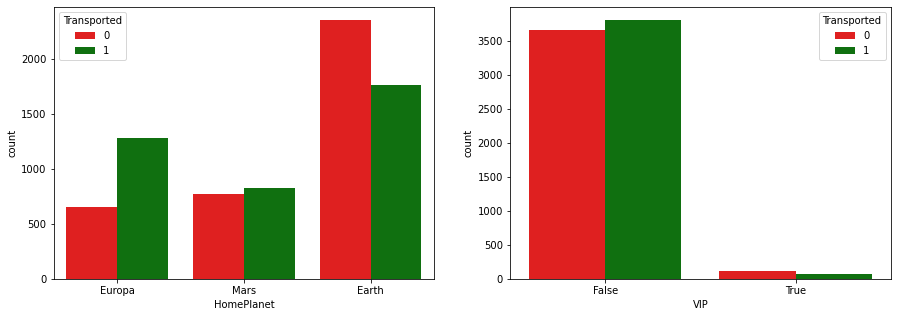

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df['HomePlanet'],hue=df['Transported'],palette=('red','green'))

plt.subplot(1,2,2)
sns.countplot(x=df['VIP'],hue=df['Transported'],palette=('red','green'))
plt.show()

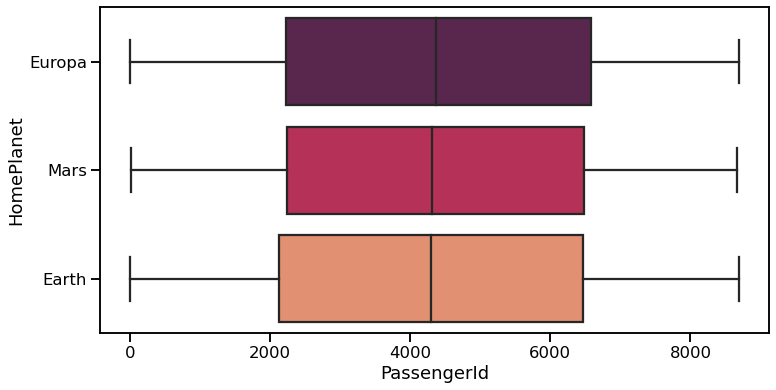

In [13]:
import seaborn 
seaborn.set_context('talk')

plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x="PassengerId", y="HomePlanet",
                palette="rocket")
plt.ticklabel_format(style='plain', axis='x')

In [14]:
variables = ['HomePlanet','Destination']
df_filter = df[variables]
df_filter.head(20)

,HomePlanet,Destination
0,Europa,TRAPPIST-1e
1,Mars,NaN
2,Europa,TRAPPIST-1e
3,Earth,TRAPPIST-1e
4,Earth,TRAPPIST-1e
5,Earth,PSO J318.5-22
6,Mars,TRAPPIST-1e
7,Europa,TRAPPIST-1e
8,Earth,TRAPPIST-1e
9,Earth,TRAPPIST-1e


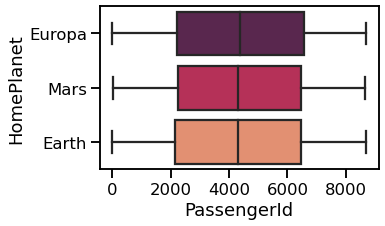

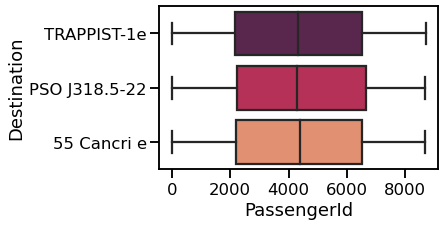

In [15]:
for col in df_filter.columns:
    plt.figure(figsize=(5,3))
    seaborn.boxplot(data=df, x="PassengerId", y=df[col],palette="rocket")
    plt.ticklabel_format(style='plain', axis='x')

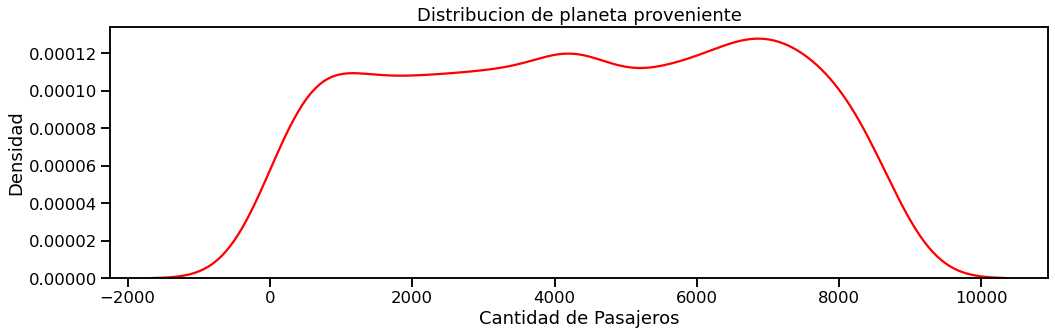

In [16]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,1,1)
seaborn.kdeplot(data = df[df['HomePlanet'] == 'Europa'],x="PassengerId",color = "red")
plt.title("Distribucion de planeta proveniente")
plt.xlabel("Cantidad de Pasajeros")
plt.ylabel("Densidad")

fig.tight_layout()
plt.show()

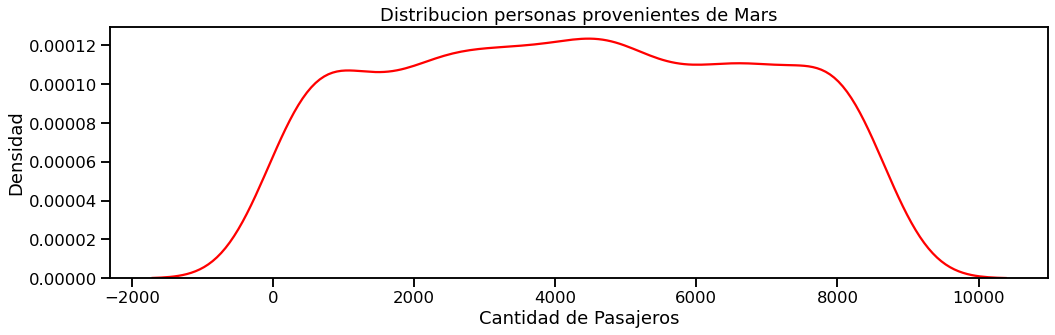

In [17]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,1,1)
seaborn.kdeplot(data = df[df['HomePlanet'] == 'Mars'],x="PassengerId",color = "red")
plt.title("Distribucion personas provenientes de Mars")
plt.xlabel("Cantidad de Pasajeros")
plt.ylabel("Densidad")

fig.tight_layout()
plt.show()

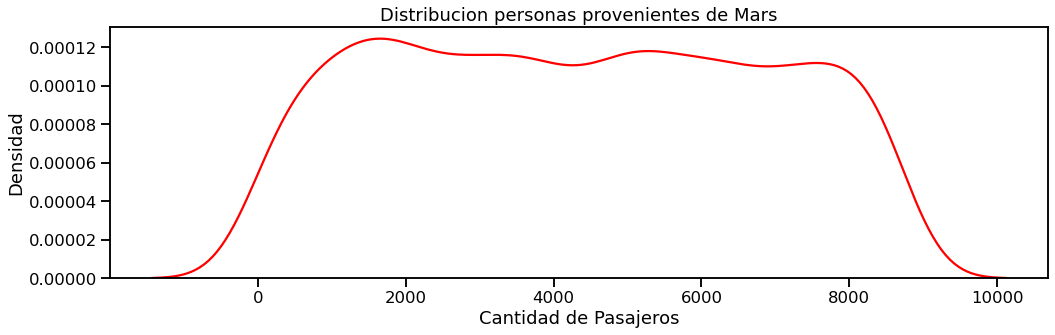

In [18]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,1,1)
seaborn.kdeplot(data = df[df['HomePlanet'] == 'Earth'],x="PassengerId",color = "red")
plt.title("Distribucion personas provenientes de Mars")
plt.xlabel("Cantidad de Pasajeros")
plt.ylabel("Densidad")

fig.tight_layout()
plt.show()

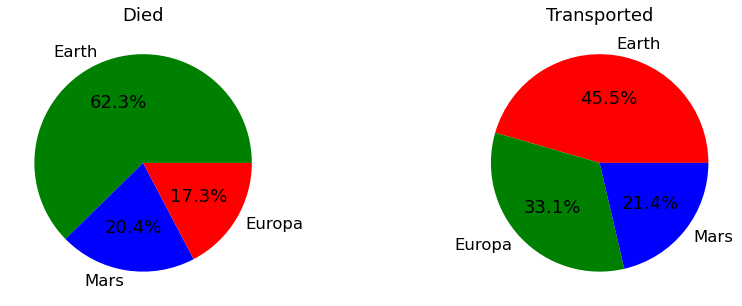

In [19]:
plt.figure(figsize=(15,5))

var = 'HomePlanet'
plt.subplot(1,2,1)
plt.title('Died')
plt.pie(df.groupby('Transported')[var].value_counts()[0],
        labels=df.groupby('Transported')[var].value_counts()[0].index,
        autopct='%1.1f%%', colors=['green','blue','red'])

plt.subplot(1,2,2)
plt.title('Transported')
plt.pie(df.groupby('Transported')[var].value_counts()[1],
        labels=df.groupby('Transported')[var].value_counts()[1].index,
        autopct='%1.1f%%', colors=['red','green','blue'])
plt.show()

In [20]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService","VIP","CryoSleep"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])

In [21]:
status(df)

,variable,Cant_nan,%_nan,Cant_zeros,%_zeros,unique,tot_rows,type
0,PassengerId,0,0.000000,1,0.012783,7823,7823,int64
1,HomePlanet,179,2.288125,0,0.000000,3,7823,object
2,CryoSleep,0,0.000000,5067,64.770548,2,7823,float64
3,Cabin,184,2.352039,0,0.000000,6009,7823,object
4,Destination,160,2.045251,0,0.000000,3,7823,object
5,Age,0,0.000000,160,2.045251,80,7823,float64
6,VIP,0,0.000000,7640,97.660744,2,7823,float64
7,RoomService,0,0.000000,5196,66.419532,1195,7823,float64
8,FoodCourt,0,0.000000,5095,65.128467,1400,7823,float64
9,ShoppingMall,0,0.000000,5224,66.777451,1045,7823,float64


In [22]:
y = df.Transported
X = df.drop('Transported',axis=1)
y.shape,X.shape

((7823,), (7823, 13))

### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [23]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.737504,0.579856,1.967465,-0.154767,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.355926,1.769839,-0.757408,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.355926,0.579856,0.290620,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.737504,0.579856,0.989305,-0.154767,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.737504,0.579856,-0.687539,-0.154767,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.737504,0.579856,-1.176619,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.737504,0.579856,1.059174,-0.154767,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.355926,0.579856,1.827728,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.737504,0.579856,-0.967013,-0.154767,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6258, 10), (6258,), (1565, 10), (1565,))

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [26]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.46%
Accuracy test {name}: 72.33%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [27]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [28]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

Accuracy train Arbol de decisión: 82.13%
Accuracy test Arbol de decisión: 77.38%


AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [29]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 76.36
Precisión test fold 1: 78.67
Precisión test fold 2: 76.76
Precisión test fold 3: 77.94
Precisión test fold 4: 76.10
Avg. accuracy = 77.16518159274497


Validamos ahora varios modelos para obtener mayor Accuracy

Primero validaremos con varios modelos para verificar cual puede ser que obtenga un mayor Accueracy

In [30]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC()]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 93.46%
Accuracy test Arbol de decisión: 72.33%
Random Forest
Accuracy train Random Forest: 93.46%
Accuracy test Random Forest: 79.68%
Regresión Logística
Accuracy train Regresión Logística: 78.35%
Accuracy test Regresión Logística: 78.08%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 80.60%
Accuracy test Perceptrón multicapa: 80.13%
XGBoost
Accuracy train XGBoost: 88.94%
Accuracy test XGBoost: 79.81%
Naive Bayes
Accuracy train Naive Bayes: 70.04%
Accuracy test Naive Bayes: 69.71%
SVM
Accuracy train SVM: 77.63%
Accuracy test SVM: 77.51%


In [32]:
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Perceptrón multicapa,0.801278
4,XGBoost,0.798083
1,Random Forest,0.796805
2,Regresión Logística,0.780831
6,SVM,0.775080
0,Arbol de decisión,0.723323
5,Naive Bayes,0.697125


En esta validacion de por todos los modelos, se puede observar que el que mejor comportamiento se obtuvo fue el de .., ya que obtiene un balance entre el tran y el test

Ahora validaremos cuales serian los mejores parametros para el modelo de Perceptron multicapa.

Ahora validaremos cuales serian los mejores parametros para el modelo de Perceptron multicapa.

In [35]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'hidden_layer_sizes':(100, (10,10)),
                'activation': ('relu','tanh'),
                'solver': ('sgd', 'adam'),
                'alpha': np.logspace(-5,-2,3),
                'learning_rate': ('constant', 'adaptive')}

grid = GridSearchCV(MLPClassifier(max_iter=50), parameter_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(max_iter=50),
             param_grid={'activation': ('relu', 'tanh'),
                         'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                         'hidden_layer_sizes': (100, (10, 10)),
                         'learning_rate': ('constant', 'adaptive'),
                         'solver': ('sgd', 'adam')})

In [36]:
grid.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': 100,
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [37]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([MLPClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=100, learning_rate='adaptive')
Precisión test fold 0: 78.12
Precisión test fold 1: 80.59
Precisión test fold 2: 79.55
Precisión test fold 3: 79.46
Precisión test fold 4: 79.38
Avg. accuracy = 79.41834391911391


In [57]:
clf = MLPClassifier(**grid.best_params_, max_iter=800)
clf = clf.fit(x_train, y_train)
test_predictions = clf.predict(x_test)
print(f'Accuracy de = {accuracy_score(y_test, test_predictions)*100}')
print(f'Precision de = {precision_score(y_test, test_predictions)*100}')

Accuracy de = 81.0223642172524
Precision de = 80.73286052009456


In [58]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       748
           1       0.81      0.84      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



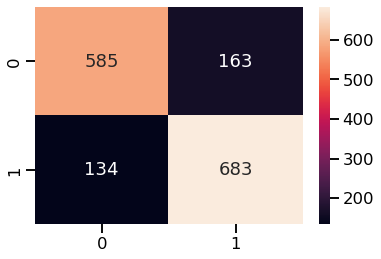

In [59]:
from sklearn.metrics import confusion_matrix,roc_curve

cm = confusion_matrix(y_test, test_predictions)
f = sns.heatmap(cm, annot=True, fmt='d')

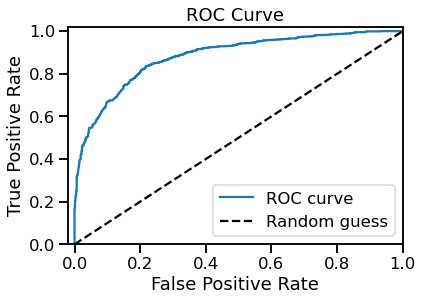

In [60]:
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [48]:
roc_auc_score(y_test, test_predictions)

0.808310533515732

Tenemos un modelo que nos predice un 80 % correctamente, por lo que buscaremos de manera no automatica buscar un modelo con diferentes hiperparámetros para validar si es posible generar un modelo mejor.

In [98]:
from xgboost import XGBClassifier

xgb_model = xgb.XGBClassifier()

parameters = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}


clf = GridSearchCV(xgb_model, parameters)
clf.fit(x_train, y_train)
test_predictions = clf.predict(x_test)
print(f'Accuracy de = {accuracy_score(y_test, test_predictions)*100}')
print(f'Precision de = {precision_score(y_test, test_predictions)*100}')

Accuracy de = 79.42492012779553
Precision de = 79.42925089179548


In [99]:
clf.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 4,
 'min_child_weight': 10,
 'subsample': 1.0}

In [103]:
tuned_model = XGBClassifier(colsample_bytree=0.6, 
                            gamma=5, 
                            max_depth=4, 
                            min_child_weight=10,
                            subsample=1.0)
tuned_model.fit(x_train, y_train)
test_predictions = tuned_model.predict(x_test)
print(f'Accuracy de = {accuracy_score(y_test, test_predictions)*100}')
print(f'Precision de = {precision_score(y_test, test_predictions)*100}')

Accuracy de = 79.42492012779553
Precision de = 79.42925089179548


## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)